# CS371 Introdution to Deep Learning - Programming Assignment 1



**In this programming assignment, you will**
* Implement forward computation for Multilayer Perceptron (MLP) neural network.
* Implement backpropagation algorithm to compute gradients for the network.
* Implement Gradient Descent optimization algorithm to train the network.
* Train and test the network on a synthetic dataset for binary classification.

**Before submitting, please make sure that you did all the 🛑<mark>TODOs</mark>**.

# 0. Essentials

In this section, we are doing the following:

- Installing the required packages
- Importing the required packages
- Define helper utilities to be used later in the assignment

In [1]:
# importing required packages
import numpy as np
import random
import sklearn.datasets
import sklearn.model_selection
import matplotlib.pyplot as plt

In [2]:
# <DO NOT CHANGE>

SEED = 42

def reset_seed():
    np.random.seed(SEED)
    random.seed(SEED)


def initialize_parameters(input_dim, output_dim):
    W = np.random.randn(output_dim, input_dim) * 0.01
    b = np.random.randn(output_dim) * 0.01
    return W, b


def initialize_parameters_xavier(input_dim, output_dim):
    W = np.random.randn(output_dim, input_dim) / np.sqrt(input_dim)
    b = np.zeros(output_dim)
    return W, b

# </DO NOT CHANGE>

# 1. Multilayer Perceptron (MLP)

## 1.1. Forward Computation

In deep learning, our goal is learning some task $\mathbf{y} = f(\mathbf{x})$ from input $\mathbf{x}$ to output $\mathbf{y}$ by having a parameterized function $\mathbf{\hat{y}} = f(\mathbf{x}; \theta)$ and learning the parameters $\theta$ from data.
In this assignment, our task is binary classification $\mathbf{y}\in\{0, 1\}$, and we use a simple Multilayer Perceptron (MLP) neural network as our parameterized function that outputs a prediction $\mathbf{\hat{y}}\in[0, 1]$.

The MLP maps inputs $\mathbf{x}\in\mathbb{R}^D$ to output predictions $\mathbf{\hat{y}}\in\mathbb{R}^C$ where $C=1$ based on two hidden layers as follows:

$$
\begin{align}
\mathbf{h}^{(1)} &= \mathrm{ReLU}\left(\mathbf{W}^{(1)}\mathbf{x}+\mathbf{b}^{(1)}\right),\\
\mathbf{h}^{(2)} &= \mathrm{ReLU}\left(\mathbf{W}^{(2)}\mathbf{h}^{(1)}+\mathbf{b}^{(2)}\right),\\
\mathbf{\hat{y}} &= \mathrm{sigmoid}\left(\mathbf{W}^{(3)}\mathbf{h}^{(2)}+\mathbf{b}^{(3)}\right),
\end{align}
$$

where $\mathbf{h}^{(1)},\mathbf{h}^{(2)}\in\mathbb{R}^H$ are activation vectors, $\mathbf{W}^{(1)}\in\mathbb{R}^{H\times D},\mathbf{W}^{(2)}\in\mathbb{R}^{H\times H},\mathbf{W}^{(3)}\in\mathbb{R}^{C\times H}$ are weight matrices, and $\mathbf{b}^{(1)},\mathbf{b}^{(2)}\in\mathbb{R}^{H},\mathbf{b}^{(3)}\in\mathbb{R}^{C}$ are bias vectors.

In addition, $\mathrm{ReLU}$ and $\mathrm{sigmoid}$ activation functions are defined as follows:

$$
\begin{align}
\mathrm{ReLU}(\mathbf{x})_i &= \max(\mathbf{x}_i, 0),\\
\mathrm{sigmoid}(\mathbf{x})_i &= \frac{1}{1 + \exp{(-\mathbf{x}_i)}}.
\end{align}
$$

As a whole, the MLP computes a parameterized function $\mathbf{\hat{y}} = f(\mathbf{x}; \theta)$ with parameters $\theta = (\mathbf{W}^{(1)}, \mathbf{b}^{(1)}, \mathbf{W}^{(2)}, \mathbf{b}^{(2)}, \mathbf{W}^{(3)}, \mathbf{b}^{(3)})$.

🛑 <mark> TODO 1</mark>: Implement the forward computation of the MLP.

In [3]:
def forward_pass_linear(x: np.ndarray, W: np.ndarray, b: np.ndarray) -> np.ndarray:

    """Performs the linear transformation.
    x: input data (shape: D)
    W: weight matrix (shape: H x D)
    b: bias vector (shape: H)
    Returns:
    out: result of linear transformation (shape: H).
    """
    out = np.dot(W,x) + b

    return out


def forward_pass_relu(x: np.ndarray) -> np.ndarray:
    """Performs the ReLU activation.
    x: input data (shape: H)
    Returns:
    out: result of ReLU activation (shape: H).
    """
    out = np.maximum(x,0) #returns max between 0 and x

    return out


def forward_pass_sigmoid(x: np.ndarray) -> np.ndarray:
    """Performs the sigmoid activation.
    x: input data (shape: H)
    Returns:
    out: result of sigmoid activation (shape: H).
    """
    out = 1 / (1 + np.exp(-x))

    return out

In [4]:
# <DO NOT CHANGE>

def forward_pass(x, W1, b1, W2, b2, W3, b3):
    """Complete forward pass through the 2-hidden layer MLP.
    x: input data (shape: D)
    W1, b1: weights and biases for first hidden layer (shape: H x D, H)
    W2, b2: weights and biases for second hidden layer (shape: H x H, H)
    W3, b3: weights and biases for output layer (shape: H x C, C)
    Returns:
    out: result of the forward pass (shape: C).
    cache: a dictionary containing intermediate outputs of forward pass
    """
    # First hidden layer
    z1 = forward_pass_linear(x, W1, b1)
    h1 = forward_pass_relu(z1)

    # Second hidden layer
    z2 = forward_pass_linear(h1, W2, b2)
    h2 = forward_pass_relu(z2)

    # Output layer
    z3 = forward_pass_linear(h2, W3, b3)
    out = forward_pass_sigmoid(z3)

    cache = {
        'z1': z1, 'h1': h1,
        'z2': z2, 'h2': h2,
        'z3': z3
    }
    return out, cache

# </DO NOT CHANGE>

After having built the MLP $\mathbf{\hat{y}} = f(\mathbf{x}; \theta)$, we would like to train it, *i.e.*, find parameters $\theta$ that minimize an objective function $J(\theta)$ defined on training data $\{(\mathbf{x}^{(i)}, \mathbf{y}^{(i)})\}_{i\leq N}$ as follows:

$$
\begin{align}
\theta^* &= \mathrm{arg}\min_\theta J(\theta),\\
J(\theta) &= \frac{1}{N}\sum_{i=1}^N{J^{(i)}(\theta)} = \frac{1}{N}\sum_{i=1}^N{\mathrm{BCELoss}\left(f(\mathbf{x}^{(i)}; \theta), \mathbf{y}^{(i)}\right)},
\end{align}
$$

where the binary cross entropy loss $\mathrm{BCELoss}\left(f(\mathbf{x}^{(i)}; \theta), \mathbf{y}^{(i)}\right)$ measures the mismatch between model prediction $f(\mathbf{x}^{(i)}; \theta)\in[0, 1]$ and binary true label $\mathbf{y}^{(i)}\in\{0, 1\}$ as follows:

$$
\mathrm{BCELoss}\left(\mathbf{\hat{y}}, \mathbf{y}\right) = - \left(\mathbf{y}\log\mathbf{\hat{y}} + (1-\mathbf{y})\log(1 - \mathbf{\hat{y}})\right).
$$

🛑 <mark> TODO 2</mark>: Implement the forward computation of the binary cross entropy loss.

In [5]:
def forward_pass_binary_cross_entropy_loss(out: np.ndarray, target: np.ndarray) -> np.ndarray:
    """Performs binary cross entropy loss computation.
    out: model output between 0 and 1 (shape: C)
    target: true label between 0 and 1 (shape: C)
    Returns:
    loss: binary cross entropy loss (shape: C).
    """
    loss = - ( (target * np.log(out)) + ((1 - target)* np.log(1 - out)) )
    return loss

Let's check the correctness of your implementation by comparing it to reference results obtained from PyTorch.

🛑 <mark> TODO 3</mark>: Run the below test code for the forward pass. (No need to code or write anything to solve this todo)

In [6]:
# <DO NOT CHANGE>

# Initialize parameters
D, H, C = 2, 3, 1
reset_seed()
W1, b1 = initialize_parameters(D, H)
W2, b2 = initialize_parameters(H, H)
W3, b3 = initialize_parameters(H, C)

# Get a random input and target
x = np.random.randn(D)
target = np.random.randint(2, size=C)

# Compute forward pass
out, cache = forward_pass(x, W1, b1, W2, b2, W3, b3)
loss = forward_pass_binary_cross_entropy_loss(out, target)

# Compare with PyTorch reference output
ref_out = np.array([0.49858720162952513])
ref_loss = np.array([0.6903255683135151])
assert np.allclose(out, ref_out), f'output {out} different from reference output {ref_out} within error tolerance, please check your implementation.'
print(f'Test passed, output {out} equal to reference output {ref_out} within error tolerance.')
assert np.allclose(loss, ref_loss), f'loss {loss} different from reference loss {ref_loss} within error tolerance, please check your implementation.'
print(f'Test passed, loss {loss} equal to reference output {ref_loss} within error tolerance.')

# </DO NOT CHANGE>

Test passed, output [0.4985872] equal to reference output [0.4985872] within error tolerance.
Test passed, loss [0.69032557] equal to reference output [0.69032557] within error tolerance.


## 1.2. Backward Computation

Up to this point, we have implemented the forward computation of the neural network and the loss function.
We will now implement the **backward pass** where the neural network learns by adjusting its parameters.

Recall our optimization problem $\theta^* = \mathrm{arg}\min_\theta J(\theta)$.
Since the objective is non-convex, we would like to optimize it through gradient descent.
Specifically, we first initialize $\theta_0$ randomly, and iteratively run below gradient descent steps with learning rate $\eta$ until convergence:

$$
\theta_{t+1} \leftarrow \theta_t - \eta \frac{\partial J(\theta_t)}{\partial \theta_t},
$$
where the gradient is computed as follows:
$$
\begin{align}
\frac{\partial J(\theta)}{\partial \theta} &= \frac{\partial}{\partial \theta} \left(\frac{1}{N}\sum_{i=1}^N{J^{(i)}(\theta)} \right) \\
&= \frac{1}{N}\sum_{i=1}^N{\frac{\partial J^{(i)}(\theta)}{\partial \theta}} = \frac{1}{N}\sum_{i=1}^N{\frac{\partial \mathrm{BCELoss}\left(f(\mathbf{x}^{(i)}; \theta), \mathbf{y}^{(i)}\right)}{\partial \theta}}.
\end{align}
$$

In below code, you need to calculate the gradients of the loss for $i$-th training data $J^{(i)}(\theta) = \mathrm{BCELoss}\left(f(\mathbf{x}^{(i)}; \theta), \mathbf{y}^{(i)}\right)$, written as $\frac{\partial J^{(i)}(\theta)}{\partial \theta}$, with respect to each weight and bias parameter, such as $\frac{\partial J^{(i)}(\theta)}{\partial \mathbf{W}^{(1)}}$, $\frac{\partial J^{(i)}(\theta)}{\partial \mathbf{b}^{(1)}}$, and so on.

For this, you need to implement the backpropagation algorithm based on chain rule for partial derivatives.
For details of the algorithm, please review the lecture slides *2. Neural Network Basics* and *3. Neural Network Optimization*.

For now, don't worry about the averaging over data points $\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{N}\sum_{i=1}^N{\frac{\partial J^{(i)}(\theta)}{\partial \theta}}$.
It will be handled in later parts of the code.
You only need to calculate $\frac{\partial J^{(i)}(\theta)}{\partial \theta}$ given a datapoint $(\mathbf{x}^{(i)}, \mathbf{y}^{(i)})$.

🛑 <mark> TODO 4</mark>: Implement the backward computation of the MLP.

In [7]:
def backward_pass_binary_cross_entropy_loss(out: np.ndarray, target: np.ndarray) -> np.ndarray:
    """Backward pass for binary cross entropy loss.
    out: model output between 0 and 1 (shape: C)
    target: true label between 0 and 1 (shape: C)
    Returns:
    dout: gradient w.r.t. out (shape: C).
    """
    dout = - ((target/out) - ((1-target)/(1-out)))
    return dout


def backward_pass_sigmoid(dout, x):
    """Backward pass for the sigmoid activation.
    dout: Upstream gradient (shape: H)
    x: input data (shape: H)
    Returns:
    dx: gradient w.r.t x (shape: H)
    """
    dx = dout * (np.exp(-x)/np.power((1+np.exp(-x)),2))
    return dx


def backward_pass_relu(dout, x):
    """Backward pass for the ReLU activation.
    dout: Upstream gradient (shape: H)
    x: input data (shape: H)
    Returns:
    dx: gradient w.r.t x (shape: H)
    """
    dx = dout *(x>0)

    return dx

def backward_pass_linear(dout, x, W, b):
    """Backward pass for the linear layer.
    dout: Upstream gradient (shape: H)
    x: input data (shape: D)
    W: weight matrix (shape: H x D)
    b: bias vector (shape: H)
    Returns:
    dx: gradient w.r.t x (shape: D)
    dW: gradient w.r.t W (shape: H x D)
    db: gradient w.r.t b (shape: H)
    """
    dx = np.dot(W.T,dout)
    dW = np.outer(dout,x)
    db = dout

    return dx, dW, db

In [8]:
# <DO NOT CHANGE>

def backward_pass(dout, x, W1, b1, W2, b2, W3, b3, cache):
    """Complete backward pass through the 2-hidden layer MLP.
    dout: Upstream gradient (usually gradient of loss w.r.t output, shape: 1)
    x: input data (shape: D)
    W1, b1, W2, b2, W3, b3: weights and biases
    cache: a dictionary containing 'z1', 'h1', 'z2', 'h2', 'z3' which are intermediate outputs of forward pass
    Returns:
    gradients: a dictionary containing gradients for all weights and biases
    """
    # Output layer gradients
    dz3 = backward_pass_sigmoid(dout, cache['z3'])
    dh2, dW3, db3 = backward_pass_linear(dz3, cache['h2'], W3, b3)

    # Second hidden layer gradients
    dz2 = backward_pass_relu(dh2, cache['z2'])
    dh1, dW2, db2 = backward_pass_linear(dz2, cache['h1'], W2, b2)

    # First hidden layer gradients
    dz1 = backward_pass_relu(dh1, cache['z1'])
    dx, dW1, db1 = backward_pass_linear(dz1, x, W1, b1)

    gradients = {
        'dW1': dW1, 'db1': db1,
        'dW2': dW2, 'db2': db2,
        'dW3': dW3, 'db3': db3
    }
    return gradients

# </DO NOT CHANGE>

Let's check the correctness of your implementation by comparing it to reference results obtained from automatic differentiation of PyTorch.

🛑 <mark> TODO 5</mark>: Run the below test code for the backward pass. (No need to code or write anything to solve this todo)

In [9]:
from numpy.lib.function_base import gradient
# <DO NOT CHANGE>

# Initialize parameters
D, H, C = 2, 3, 1
reset_seed()
W1, b1 = initialize_parameters(D, H)
W2, b2 = initialize_parameters(H, H)
W3, b3 = initialize_parameters(H, C)

# Get a random input and target
x = np.random.randn(D)
target = np.random.randint(2, size=C)

# Compute forward pass
out, cache = forward_pass(x, W1, b1, W2, b2, W3, b3)
loss = forward_pass_binary_cross_entropy_loss(out, target)

# Compute backward pass
dout = backward_pass_binary_cross_entropy_loss(out, target)
gradients = backward_pass(dout, x, W1, b1, W2, b2, W3, b3, cache)

# Compare with reference gradients
ref_dout = np.array([1.99436473])
ref_dW1 = np.array([[4.4305505e-06, -4.5973820e-05], [0, 0], [0, 0]])
ref_db1 = np.array([3.9942725e-05, 0, 0])
ref_dW2 = np.array([[0, 0, 0], [0, 0, 0], [-0.0001274, 0, 0]])
ref_db2 = np.array([[0, 0, -0.00710361]])
ref_dW3 = np.array([[0, 0, 0.00725726]])
ref_db3 = np.array([0.4985872])
ref_gradients = {
    'dW1': ref_dW1, 'db1': ref_db1,
    'dW2': ref_dW2, 'db2': ref_db2,
    'dW3': ref_dW3, 'db3': ref_db3
}
assert np.allclose(dout, ref_dout), f'gradient dout:\n{dout}\ndifferent from reference gradient\n{ref_dout}\nwithin error tolerance, please check your implementation.'
print(f'Test passed, gradient dout equal to reference gradient within error tolerance.')
for name, grad in gradients.items():
    ref_grad = ref_gradients[name]
    assert np.allclose(grad, ref_grad), f'gradient {name}:\n{grad}\ndifferent from reference gradient\n{ref_grad}\nwithin error tolerance, please check your implementation.'
    print(f'Test passed, gradient {name} equal to reference gradient within error tolerance.')

# </DO NOT CHANGE>

Test passed, gradient dout equal to reference gradient within error tolerance.
Test passed, gradient dW1 equal to reference gradient within error tolerance.
Test passed, gradient db1 equal to reference gradient within error tolerance.
Test passed, gradient dW2 equal to reference gradient within error tolerance.
Test passed, gradient db2 equal to reference gradient within error tolerance.
Test passed, gradient dW3 equal to reference gradient within error tolerance.
Test passed, gradient db3 equal to reference gradient within error tolerance.


## 1.3. Gradient Descent

With the forward and backward passes correctly implemented, we can now implement the gradient descent algorithm to solve our optimization $\theta^* = \mathrm{arg}\min_\theta J(\theta)$.
We first initialize $\theta_0$ randomly, and iteratively run below gradient descent steps with learning rate $\eta$ until convergence:

$$
\theta_{t+1} \leftarrow \theta_t - \eta \frac{\partial J(\theta_t)}{\partial \theta_t}.
$$

In the below code, you need to implement gradient descent steps that update current parameters $\theta_t$ given gradients $\frac{\partial J(\theta_t)}{\partial \theta_t}$ and learning rate $\eta$.

🛑 <mark> TODO 6</mark>: Implement the gradient descent update steps for the MLP.

In [10]:
def update_parameters(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, learning_rate):
    """A single step of gradient descent update.
    W1, b1, W2, b2, W3, b3: weights and biases
    dW1, db1, dW2, db2, dW3, db3: gradient of the object function w.r.t. weights and biases
    learning_rate: learning rate
    Returns:
    W1, b1, W2, b2, W3, b3: updated weights and biases
    """
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3
    return W1, b1, W2, b2, W3, b3

## 1.4. Training and Testing on Synthetic Binary Classification

Let's test your implementation by training and testing the MLP on a synthetic binary classification dataset.

🛑 <mark> TODO 7</mark>: Run the below test code for MLP and gradient descent. (No need to code or write anything to solve this todo)

In [11]:
# <DO NOT CHANGE>

# Main function to train the network
def train_network(X_train, Y_train, W1, b1, W2, b2, W3, b3, gradient_steps, learning_rate):

    # Run training with gradient descent
    for gradient_step in range(gradient_steps):
        loss_list = []
        gradients_list = []

        for x, target in zip(X_train, Y_train):
            # Compute forward pass
            out, cache = forward_pass(x, W1, b1, W2, b2, W3, b3)
            loss = forward_pass_binary_cross_entropy_loss(out, target)

            # Compute backward pass
            dout = backward_pass_binary_cross_entropy_loss(out, target)
            gradients = backward_pass(dout, x, W1, b1, W2, b2, W3, b3, cache)

            loss_list.append(loss)
            gradients_list.append(gradients)

        # Average gradients over dataset
        dW1 = np.mean(np.stack([gradients['dW1'] for gradients in gradients_list], axis=0), axis=0)
        db1 = np.mean(np.stack([gradients['db1'] for gradients in gradients_list], axis=0), axis=0)
        dW2 = np.mean(np.stack([gradients['dW2'] for gradients in gradients_list], axis=0), axis=0)
        db2 = np.mean(np.stack([gradients['db2'] for gradients in gradients_list], axis=0), axis=0)
        dW3 = np.mean(np.stack([gradients['dW3'] for gradients in gradients_list], axis=0), axis=0)
        db3 = np.mean(np.stack([gradients['db3'] for gradients in gradients_list], axis=0), axis=0)

        # Gradient descent step
        W1, b1, W2, b2, W3, b3 = update_parameters(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, learning_rate)

        # Print loss every 100 gradient descent steps
        if gradient_step % 100 == 0:
            print(f"Step {gradient_step}, Loss: {np.mean(loss_list)}")

    # Final loss for correctness test
    final_loss = np.mean(loss_list)

    return W1, b1, W2, b2, W3, b3, final_loss

# <\DO NOT CHANGE>

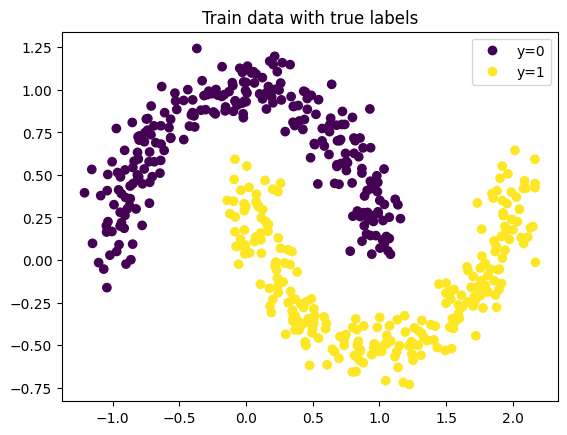

Step 0, Loss: 0.7140544802694987
Step 100, Loss: 0.2479396959616493
Step 200, Loss: 0.2108366745307876
Step 300, Loss: 0.18241214726114333
Step 400, Loss: 0.14692518777515215
Step 500, Loss: 0.10810690986307148
Step 600, Loss: 0.07294837979836244
Step 700, Loss: 0.04914191671958637
Step 800, Loss: 0.034121999917327346
Step 900, Loss: 0.024886650129609222


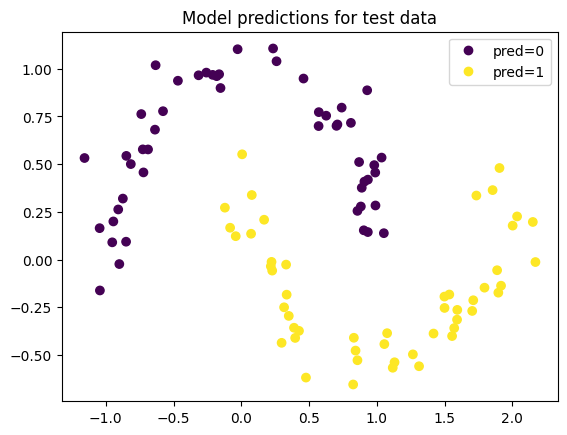

Test passed, final train loss: 0.019107356285473685.
Test passed, test accuracy: 100.0%.


In [12]:
# <DO NOT CHANGE>

# Setup train and test datasets
X, Y = sklearn.datasets.make_moons(n_samples=500, noise=0.1, random_state=42)
Y = np.expand_dims(Y, 1)
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=24)

# Visualize dataset
plt.figure()
plt.title('Train data with true labels')
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.legend(handles=scatter.legend_elements()[0], labels=['y=0', 'y=1'])
plt.show()

# Initialize parameters
D, H, C = X_train.shape[-1], 32, Y_train.shape[-1]
reset_seed()
W1, b1 = initialize_parameters_xavier(D, H)
W2, b2 = initialize_parameters_xavier(H, H)
W3, b3 = initialize_parameters_xavier(H, C)

# Run training with gradient descent
gradient_steps = 1000
learning_rate = 0.1
W1, b1, W2, b2, W3, b3, final_loss = train_network(X_train, Y_train, W1, b1, W2, b2, W3, b3, gradient_steps, learning_rate)

# Run predictions on the test data
out_list = []
for x, target in zip(X_test, Y_test):
    out, _ = forward_pass(x, W1, b1, W2, b2, W3, b3)
    out_list.append(out)
predictions = (np.stack(out_list, axis=0) > 0.5).astype(int)
accuracy = np.mean(predictions == Y_test)

# Visualize predictions
plt.figure()
plt.title('Model predictions for test data')
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions)
plt.legend(handles=scatter.legend_elements()[0], labels=['pred=0', 'pred=1'])
plt.show()

# Test correctness
ref_final_loss = 0.019107356285473685
ref_accuracy = 1.
assert np.allclose(final_loss, ref_final_loss), f'Final train loss: {final_loss} different from reference loss {ref_final_loss}, please check your implementation.'
print(f'Test passed, final train loss: {final_loss}.')
assert np.allclose(accuracy, ref_accuracy), f'Test accuracy: {100 * accuracy}% different from reference accuracy {100 * ref_accuracy}, please check your implementation.'
print(f'Test passed, test accuracy: {100 * accuracy}%.')

# <\DO NOT CHANGE>